<a href="https://colab.research.google.com/github/AnastasiyaSopyryaeva/ML_LSTM_Timeseries/blob/main/scripts/main_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Notebook for replicating the paper "Prediction of air quality in Jakarta during the COVID-19 outbreak using long short-term memory machine learning" by Wihayati and F W Wibowo 2021 IOP Conf. Ser.: Earth Environ. Sci. 704 012046.

**Submitted by - Manu Srivastava, Anastasiya Sopyryaeva**

## STEP 1 – importing the raw data and python libraries

In [ ]:
# copying data from GitHub repository to Google Colab environment
! git clone https://github.com/AnastasiyaSopyryaeva/ML_LSTM_Timeseries.git

fatal: destination path 'ML_LSTM_Timeseries' already exists and is not an empty directory.


In [ ]:
# importing libraries
%run ML_LSTM_Timeseries/scripts/setup.ipynb

### Data Import

### Importing the raw data for DKI1 (Bunderan HI), DKI2 (Kelapa Gading), DKI3 (Jagakarsa), DKI4 (Lubang Buaya), and DKI5 (Kebon Jeruk) Jakarta Barat.

In [ ]:
# -------------------------January dataset
df_jan_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2020.csv', 
                          names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                          header=0)
print(df_jan_2020.head())

# -------------------------February dataset
df_feb_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2020.csv', 
                          names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                          header=0)
print(df_feb_2020.head())

# -------------------------March dataset
df_mar_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2020.csv',
                         names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                         header=0)
print(df_mar_2020.head())

         date            location pm10 so2  co  o3 no2  max_value  \
0  2020-01-01  DKI1 (Bunderan HI)   30  20  10  32   9         32   
1  2020-01-02  DKI1 (Bunderan HI)   27  22  12  29   8         29   
2  2020-01-03  DKI1 (Bunderan HI)   39  22  14  32  10         39   
3  2020-01-04  DKI1 (Bunderan HI)   34  22  14  38  10         38   
4  2020-01-05  DKI1 (Bunderan HI)   35  22  12  31   9         35   

  critical_polutant polution_level  
0                O3           BAIK  
1                O3           BAIK  
2              PM10           BAIK  
3                O3           BAIK  
4              PM10           BAIK  
         date            location pm10 so2  co  o3 no2  max_value  \
0  2020-02-01  DKI1 (Bunderan HI)   29   8  19  27  14         29   
1  2020-02-02  DKI1 (Bunderan HI)   37  10  24  28  12         37   
2  2020-02-03  DKI1 (Bunderan HI)   39   8  37  19  15         39   
3  2020-02-04  DKI1 (Bunderan HI)   24   8  29  21  14         29   
4  2020-02-05  DKI

Looking at the imported data, we see that the imported data for `March` has some inconsistency in the location column, First we will get rid of that in the code block below.

In [ ]:
# change location values in df_mar_2020 for consistency with other df's
df_mar_2020['location'][:31] = 'DKI1 (Bunderan HI)'
df_mar_2020['location'][31:62] = 'DKI2 (Kelapa Gading)'
df_mar_2020['location'][62:93] = 'DKI3 (Jagakarsa)'
df_mar_2020['location'][93:124] = 'DKI4 (Lubang Buaya)'
df_mar_2020['location'][124:] = 'DKI5 (Kebon Jeruk) Jakarta Barat'

print(df_mar_2020.head())

         date            location pm10 so2  co  o3  no2  max_value  \
0  2020-03-01  DKI1 (Bunderan HI)    5  13  28   8   45        1.0   
1  2020-03-02  DKI1 (Bunderan HI)    5  15  32  10   34        1.0   
2  2020-03-03  DKI1 (Bunderan HI)    5  23  29  14   59        1.0   
3  2020-03-04  DKI1 (Bunderan HI)    7  19  55  16   56        1.0   
4  2020-03-05  DKI1 (Bunderan HI)    6  16  30  13   35        1.0   

  critical_polutant polution_level  
0              PM10           BAIK  
1              PM10           BAIK  
2              PM10         SEDANG  
3              PM10         SEDANG  
4              PM10           BAIK  


<ipython-input-36-933aeae759ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar_2020['location'][:31] = 'DKI1 (Bunderan HI)'
<ipython-input-36-933aeae759ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar_2020['location'][31:62] = 'DKI2 (Kelapa Gading)'
<ipython-input-36-933aeae759ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar_2020['location'][62:93] = 'DKI3 (Jagakarsa)'
<ipython-input-36-933aeae759ca>:5: S

In [ ]:
# -------------------------April dataset
df_apr_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2020.csv', 
                          names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                          header=0)
print(df_apr_2020.head())

# -------------------------May dataset
df_may_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2020.csv', 
                          names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                          header=0)
print(df_may_2020.head())

# -------------------------June dataset
df_jun_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2020.csv', 
                          names=['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level'], 
                          header=0)
print(df_jun_2020.head())

         date            location pm10 so2  co  o3 no2  max_value  \
0  2020-04-01  DKI1 (Bunderan HI)   38   6  12  67  10         67   
1  2020-04-02  DKI1 (Bunderan HI)   32   4   6  33   7         33   
2  2020-04-03  DKI1 (Bunderan HI)   30   5   4  33   5         33   
3  2020-04-04  DKI1 (Bunderan HI)   42   6   8  47   7         47   
4  2020-04-05  DKI1 (Bunderan HI)   50   4   6  63   8         63   

  critical_polutant polution_level  
0                O3         SEDANG  
1                O3           BAIK  
2                O3           BAIK  
3                O3           BAIK  
4                O3         SEDANG  
         date            location pm10 so2   co  o3 no2  max_value  \
0  2020-05-01  DKI1 (Bunderan HI)   47   2  ---  38  10         47   
1  2020-05-02  DKI1 (Bunderan HI)   32   2   12  29   9         32   
2  2020-05-03  DKI1 (Bunderan HI)   52   5   11  35   9         52   
3  2020-05-04  DKI1 (Bunderan HI)   50   4    4  30   8         50   
4  2020-05-05

### Importing the raw data for Province of DKI Jakarta which is provided for each month in separate csv files.

In [ ]:
#-------------------------Jan
df_dki_jan_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv', 
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level', 'location'], 
                              header=0)
print(df_dki_jan_2020.info())

#-------------------------Feb
df_dki_feb_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2020.csv', 
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level', 'location'], 
                              header=0)
print(df_dki_feb_2020.info())
print(df_dki_feb_2020)

#-------------------------March
df_dki_mar_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2020.csv',
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'location', 'critical_polutant', 'polution_level'], 
                              header=0)
                     
print(df_dki_mar_2020.info())
print(df_dki_mar_2020)

#-------------------------April
df_dki_apr_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2020.csv',
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level', 'location'], 
                              header=0)
print(df_dki_apr_2020.info())

#-------------------------May
df_dki_may_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-mei-tahun-2020.csv',
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level', 'location'], 
                              header=0)
print(df_dki_may_2020.info())

#-------------------------June
df_dki_jun_2020 = pd.read_csv('ML_LSTM_Timeseries/data/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2020.csv',
                              names=['date', 'pm10', 'so2', 'co', 'o3', 'no2', 'max_value', 'critical_polutant', 'polution_level', 'location'], 
                              header=0)
print(df_dki_jun_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               31 non-null     object
 1   pm10               31 non-null     int64 
 2   so2                31 non-null     int64 
 3   co                 31 non-null     int64 
 4   o3                 31 non-null     int64 
 5   no2                31 non-null     int64 
 6   max_value          31 non-null     int64 
 7   critical_polutant  31 non-null     object
 8   polution_level     31 non-null     object
 9   location           31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               29 non-null     object
 1   pm10               29 non-nul

Concatenating the data for all months for the Province of Jakarta in code block below.

In [ ]:
df_dki_jakarta = pd.concat([df_dki_jan_2020, df_dki_feb_2020, df_dki_mar_2020, df_dki_apr_2020, df_dki_may_2020, df_dki_jun_2020], ignore_index=True)
df_dki_jakarta.info()

# adding the location column as like the other dataframes
df_dki_jakarta['location'] = 'Province of DKI Jakarta'
df_dki_jakarta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               182 non-null    object
 1   pm10               182 non-null    int64 
 2   so2                182 non-null    object
 3   co                 182 non-null    object
 4   o3                 182 non-null    int64 
 5   no2                182 non-null    int64 
 6   max_value          182 non-null    int64 
 7   critical_polutant  182 non-null    object
 8   polution_level     182 non-null    object
 9   location           182 non-null    object
dtypes: int64(4), object(6)
memory usage: 14.3+ KB


,date,pm10,so2,co,o3,no2,max_value,critical_polutant,polution_level,location
0,2020-01-01,38,36,25,46,9,46,O3,BAIK,Province of DKI Jakarta
1,2020-01-02,45,36,39,102,8,102,O3,TIDAK SEHAT,Province of DKI Jakarta
2,2020-01-03,51,37,27,63,10,63,O3,SEDANG,Province of DKI Jakarta
3,2020-01-04,51,38,19,85,10,85,O3,SEDANG,Province of DKI Jakarta
4,2020-01-05,52,39,25,62,9,62,O3,SEDANG,Province of DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...
177,2020-06-26,78,24,23,97,19,97,O3,SEDANG,Province of DKI Jakarta
178,2020-06-27,75,25,18,69,14,75,PM10,SEDANG,Province of DKI Jakarta
179,2020-06-28,80,25,16,81,11,81,O3,SEDANG,Province of DKI Jakarta
180,2020-06-29,78,24,15,90,15,90,O3,SEDANG,Province of DKI Jakarta


## STEP 2 – Cleaning the data

These are the things we did to clean the data and make it ready for use.

- joing datasets for the different months
- removing unwanted columns
- removing duplicates of data
- checking the value type in the polluatant columns and making sure to remove all NaN values
- making sure the data type values are represented correctly
- making sure that we have all the correct location names in the final dataframe.


In [ ]:
# concat the six dataframes
df = pd.concat([df_jan_2020, df_feb_2020, df_mar_2020, df_apr_2020, df_may_2020, df_jun_2020, df_dki_jakarta], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1092 non-null   object 
 1   location           1092 non-null   object 
 2   pm10               1092 non-null   object 
 3   so2                1092 non-null   object 
 4   co                 1092 non-null   object 
 5   o3                 1092 non-null   object 
 6   no2                1092 non-null   object 
 7   max_value          1089 non-null   float64
 8   critical_polutant  1085 non-null   object 
 9   polution_level     1092 non-null   object 
dtypes: float64(1), object(9)
memory usage: 85.4+ KB


In [ ]:
# leave only relevant columns
df = df[['date', 'location', 'pm10', 'so2', 'co', 'o3', 'no2']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1092 non-null   object
 1   location  1092 non-null   object
 2   pm10      1092 non-null   object
 3   so2       1092 non-null   object
 4   co        1092 non-null   object
 5   o3        1092 non-null   object
 6   no2       1092 non-null   object
dtypes: object(7)
memory usage: 59.8+ KB


In [ ]:
# remove duplicated rows based on date and location, keeping only the first row
df.drop_duplicates(subset=['date', 'location'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      975 non-null    object
 1   location  975 non-null    object
 2   pm10      975 non-null    object
 3   so2       975 non-null    object
 4   co        975 non-null    object
 5   o3        975 non-null    object
 6   no2       975 non-null    object
dtypes: object(7)
memory usage: 60.9+ KB


In [ ]:
# check if all values in the columns representing polutants' levels are numbers 
# errors='coerce' replaces not numerical values with NA; .notnull().all() checks whether there are NA's in the columns or not and returns Boolean value
df[['pm10', 'so2', 'co', 'o3', 'no2']].apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

pm10    False
so2     False
co      False
o3      False
no2     False
dtype: bool

In [ ]:
# check if all values in the 'date' column are represented correctly
df[['date']].apply(lambda s: pd.to_datetime(s, errors='coerce')).notnull().all()

date    True
dtype: bool

In [ ]:
# check if all values in the 'location' column are represented correctly
df['location'].unique()

array(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)',
       'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk) Jakarta Barat',
       'Province of DKI Jakarta'], dtype=object)

The data check of the columns 'date' and 'location' revealed no noise. However, in the columns representing pollutants' levels, there are NAN values. The code below is designed to clean the clean the missing data. 

In [ ]:
# the function check_int returns NaN if the input value is an integer and value itself otherwise
def check_int(value):
    try:
        int(value)
        return np.NaN
    except ValueError:
        return value

# apply function check_int to pollutant level columns in order to reveal non-integer values
print(df['pm10'].apply(check_int).dropna())
print(df['so2'].apply(check_int).dropna())
print(df['co'].apply(check_int).dropna())
print(df['o3'].apply(check_int).dropna())
print(df['no2'].apply(check_int).dropna())

58     ---
182    ---
188    ---
197    ---
248    ---
253    ---
254    ---
372    ---
380    ---
404    ---
423    ---
424    ---
425    ---
426    ---
427    ---
442    ---
443    ---
444    ---
445    ---
446    ---
447    ---
448    ---
449    ---
450    ---
595    ---
698    ---
699    ---
700    ---
701    ---
702    ---
703    ---
728    ---
Name: pm10, dtype: object
22     ---
23     ---
24     ---
25     ---
26     ---
27     ---
197    ---
248    ---
264    ---
297    ---
298    ---
299    ---
372    ---
399    ---
401    ---
403    ---
404    ---
405    ---
412    ---
414    ---
415    ---
417    ---
418    ---
419    ---
423    ---
425    ---
497    ---
579    ---
580    ---
581    ---
582    ---
583    ---
584    ---
585    ---
586    ---
587    ---
588    ---
589    ---
590    ---
728    ---
970    ---
971    ---
972    ---
973    ---
988    ---
989    ---
990    ---
991    ---
992    ---
993    ---
994    ---
995    ---
996    ---
Name: so2, dtype: object
93     ---
197

In [ ]:
# all the non-integer values appeared to be missing values recorded as '---'
# let's remove the rows with the missing data. We make no replacement of these rows since the number and location of missing data are not significant.

df.replace('---', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,date,location,pm10,so2,co,o3,no2
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9
...,...,...,...,...,...,...,...
1087,2020-06-26,Province of DKI Jakarta,78,24,23,97,19
1088,2020-06-27,Province of DKI Jakarta,75,25,18,69,14
1089,2020-06-28,Province of DKI Jakarta,80,25,16,81,11
1090,2020-06-29,Province of DKI Jakarta,78,24,15,90,15


In [ ]:
# check if all values in the columns representing polutants' levels are numbers 
df[['pm10', 'so2', 'co', 'o3', 'no2']].apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

pm10    True
so2     True
co      True
o3      True
no2     True
dtype: bool

In [ ]:
# converting datatypes to releant
df[['pm10', 'so2', 'co', 'o3', 'no2']] = df[['pm10', 'so2', 'co', 'o3', 'no2']].apply(pd.to_numeric)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

# setting index to date for further convinience 
df.index = df['date']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 859 entries, 2020-01-01 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      859 non-null    datetime64[ns]
 1   location  859 non-null    object        
 2   pm10      859 non-null    int64         
 3   so2       859 non-null    int64         
 4   co        859 non-null    int64         
 5   o3        859 non-null    int64         
 6   no2       859 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 53.7+ KB


NOTE: After data cleaning process in the dataframe, the number of rows dropped from 1092 to 859.

117 rows were removed because of the duplicates, other 116 rows were removed because of the missing data.


## STEP 3 - Data description

We wrote two functions, specifically to split the processed data into seprate dataframes for individual locations and to describe the inidividual polltant data for each location.

We matches the visualisation with the ones provided in the refference paper and found most of them to be the same.

The only exception being the data for the province of Jakarta which was inconsistent with the visualised data in the paper. 

> NOTE: In our dataset, the values of polltant `03` and `PM10` never go as low as shown in the paper. This will impact the training of the model later.

In [ ]:
# the function split_df takes in input dataframe and location name; returns new dataframe with data related only to the inut location
def split_df(df, location_name):
  new_df = df[df['location'] == location_name]
  print(new_df.info())
  return new_df

# the function describe_pollutant takes in input dataframe and pollutant names; returns the plots of the pollutant distributions over time
def describe_pollutants(df, pollutant_name1,pollutant_name2,location):
  # Generate data for two graphs
  location = location
  x = df['date']   
  y1 = df[pollutant_name1] 
  y2 = df[pollutant_name2] 

  # Create figure and add subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  # Plot data in the first subplot
  ax1.plot(x, y1, 'r-', label=pollutant_name1)
  ax1.legend()
  ax1.set_xlabel('x')
  ax1.set_ylabel(pollutant_name1 + ' in ' + location)

  # Plot data in the second subplot
  ax2.plot(x, y2, 'b-', label=pollutant_name2)
  ax2.legend()
  ax2.set_xlabel('x')
  ax2.set_ylabel(pollutant_name2 + ' in ' + location)

  # Show the figure
  plt.show()

### Data visulation for `DK1 - Bunderan HI`
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      148 non-null    datetime64[ns]
 1   location  148 non-null    object        
 2   pm10      148 non-null    int64         
 3   so2       148 non-null    int64         
 4   co        148 non-null    int64         
 5   o3        148 non-null    int64         
 6   no2       148 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.2+ KB
None


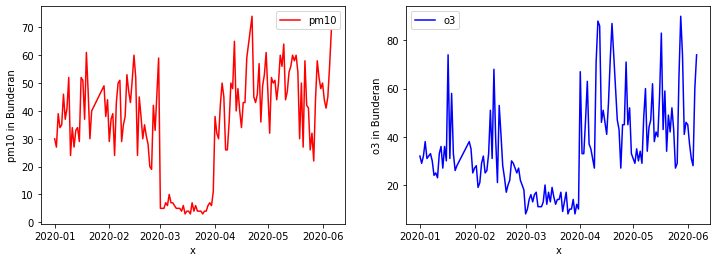

In [ ]:
df_bunderan = split_df(df, 'DKI1 (Bunderan HI)')
describe_pollutants(df_bunderan, 'pm10','o3','Bunderan')

### Data visulation for `DK2 - Kelapa Gading`
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      147 non-null    datetime64[ns]
 1   location  147 non-null    object        
 2   pm10      147 non-null    int64         
 3   so2       147 non-null    int64         
 4   co        147 non-null    int64         
 5   o3        147 non-null    int64         
 6   no2       147 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.2+ KB
None


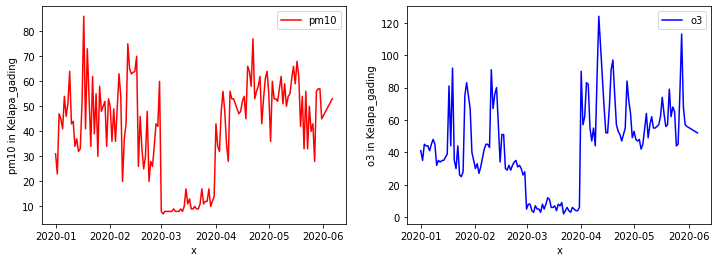

In [ ]:
df_kelapa_gading = split_df(df, 'DKI2 (Kelapa Gading)')
describe_pollutants(df_kelapa_gading, 'pm10','o3','Kelapa_gading')

### Data visulation for `DK3 - Jagakarsa`
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2020-01-05 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      133 non-null    datetime64[ns]
 1   location  133 non-null    object        
 2   pm10      133 non-null    int64         
 3   so2       133 non-null    int64         
 4   co        133 non-null    int64         
 5   o3        133 non-null    int64         
 6   no2       133 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.3+ KB
None


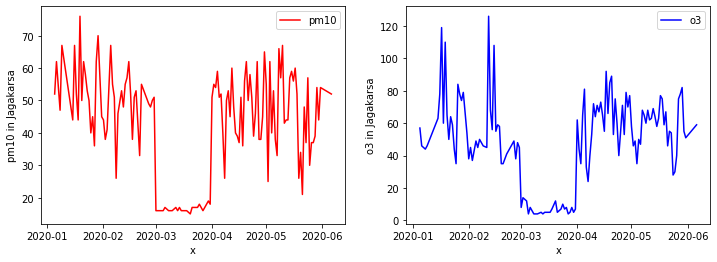

In [ ]:
df_jagakarsa = split_df(df, 'DKI3 (Jagakarsa)')
describe_pollutants(df_jagakarsa, 'pm10','o3','Jagakarsa')

### Data visulation for `DK4 - Lubang Buaya
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-01-02 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      122 non-null    datetime64[ns]
 1   location  122 non-null    object        
 2   pm10      122 non-null    int64         
 3   so2       122 non-null    int64         
 4   co        122 non-null    int64         
 5   o3        122 non-null    int64         
 6   no2       122 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 7.6+ KB
None


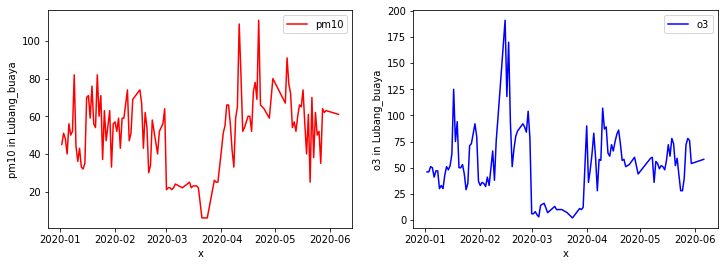

In [ ]:
df_lubang_buaya = split_df(df, 'DKI4 (Lubang Buaya)')
describe_pollutants(df_lubang_buaya, 'pm10','o3','Lubang_buaya')

### Data visulation for `DK5 - Kebon Jeruk`
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2020-01-02 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      141 non-null    datetime64[ns]
 1   location  141 non-null    object        
 2   pm10      141 non-null    int64         
 3   so2       141 non-null    int64         
 4   co        141 non-null    int64         
 5   o3        141 non-null    int64         
 6   no2       141 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.8+ KB
None


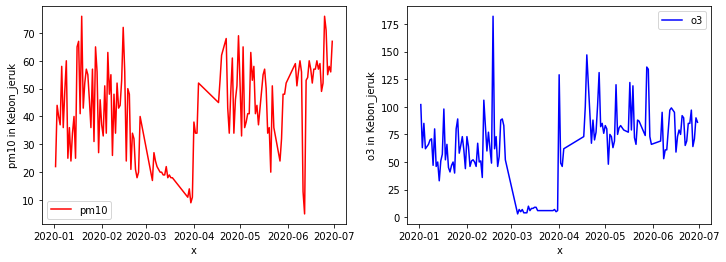

In [ ]:
df_kebon_jeruk = split_df(df, 'DKI5 (Kebon Jeruk) Jakarta Barat')
describe_pollutants(df_kebon_jeruk, 'pm10','o3','Kebon_jeruk')

### Data visulation for `DK6 - Province of Jakarta`
Plotting the observed data of 'pm10' and 'o3' over the entire time span of observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2020-01-01 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      168 non-null    datetime64[ns]
 1   location  168 non-null    object        
 2   pm10      168 non-null    int64         
 3   so2       168 non-null    int64         
 4   co        168 non-null    int64         
 5   o3        168 non-null    int64         
 6   no2       168 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.5+ KB
None


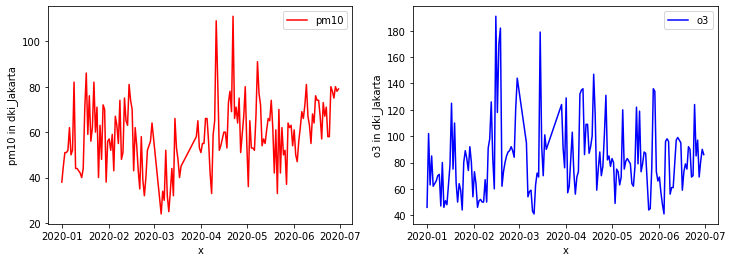

In [ ]:
df_dki = split_df(df, 'Province of DKI Jakarta')
describe_pollutants(df_dki, 'pm10','o3','dki_Jakarta')

## STEP 4 - Building the LSTM model

Using the desciption provided in the refference paper, we build a function to create an LSTM model. 

We also write two functions to assist our model, one for preparing input arrays from our dataframes and the second one to split it into training and test set. 

We have used the tesnserflow library to build our model.

- write a function to prepare input and outpute arrays for training
- split the data into training and test set
- compile the model with different optimisers
- train the model on different pollutants


In [ ]:
# the function prepares data to fit RNN model; it takes in input a series object and creates two numpy arrays: 
# an array containing input sequences of specified size for RNN, and a response array
def prepare_response(df, size=5):
    df_as_np = df.to_numpy() #converting the entire dataframe to a multi-dimensional dataframe
    x,y = [],[]
    print("Length of the array is ->",len(df_as_np))
    for i in range(len(df_as_np)-size):
        line = [[a] for a in df_as_np[i:i+size]]
        x.append(line)
        response = df_as_np[i+size]
        y.append(response)
    return np.array(x), np.array(y)

# the function performs train/test data split in 70/30 proportion
def train_test_split(df, location_name, pollutant_name):
  df_location = split_df(df, location_name)
  x, y = prepare_response(df_location[pollutant_name])
  n_train = round(len(df_location[pollutant_name]) * 0.7)
  x_train, y_train = x[:n_train], y[:n_train]
  x_test, y_test = x[n_train:], y[n_train:]
  return x_train, y_train, x_test, y_test

# the function creates LSTM RNN model based on optimizer and lstm layer activation function choices
def create_model(optimizer, lstm_activation = 'relu'):
  model = Sequential()
  model.add(tf.keras.Input(shape=(5 ,1)))
  model.add(LSTM(4, activation=lstm_activation))
  model.add(Dense(1, activation='linear'))
  model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])
  return model

## STEP 5 - Training the model

We use the `create_model` function to create unique instances of our model with different optimisers and for each location. 

This gives us `6 * 3 * 2 = 36` instances of the model which we compare later. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      148 non-null    datetime64[ns]
 1   location  148 non-null    object        
 2   pm10      148 non-null    int64         
 3   so2       148 non-null    int64         
 4   co        148 non-null    int64         
 5   o3        148 non-null    int64         
 6   no2       148 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.2+ KB
None
Length of the array is -> 148
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      148 non-null    datetime64[ns]
 1   location  148 non-null    object        
 2   pm10      148 non-null    int64         
 3   s

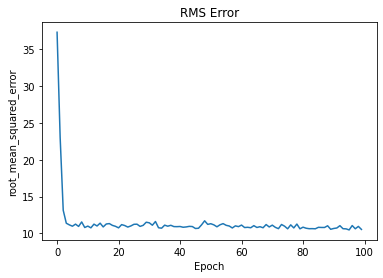

History of training for this location --> DKI1 (Bunderan HI) with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


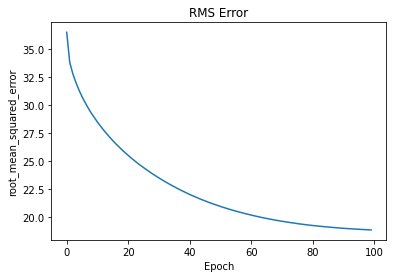

History of training for this location --> DKI1 (Bunderan HI) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


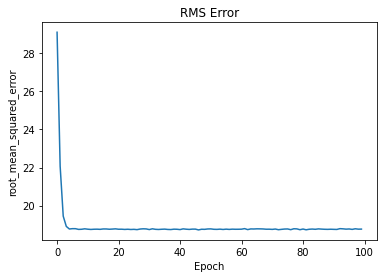

History of training for this location --> DKI1 (Bunderan HI) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


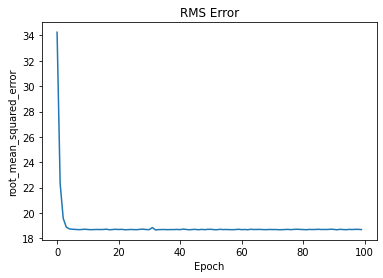

History of training for this location --> DKI1 (Bunderan HI) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


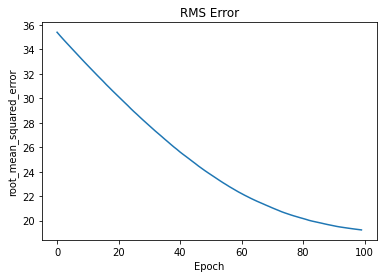

History of training for this location --> DKI1 (Bunderan HI) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


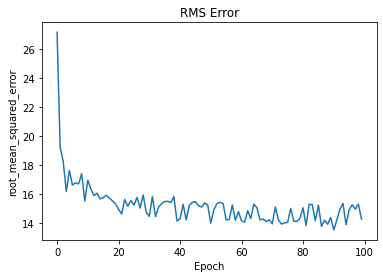

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      147 non-null    datetime64[ns]
 1   location  147 non-null    object        
 2   pm10      147 non-null    int64         
 3   so2       147 non-null    int64         
 4   co        147 non-null    int64         
 5   o3        147 non-null    int64         
 6   no2       147 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.2+ KB
None
Length of the array is -> 147
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      147 non-null    datetime64[ns]
 1   location  147 non-null    object        
 2   pm10      147 non-null    int64         
 3   s

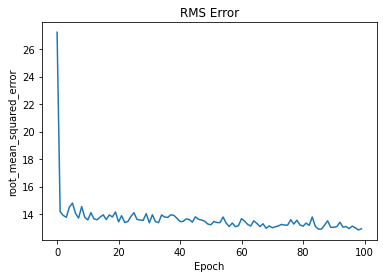

History of training for this location --> DKI2 (Kelapa Gading) with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


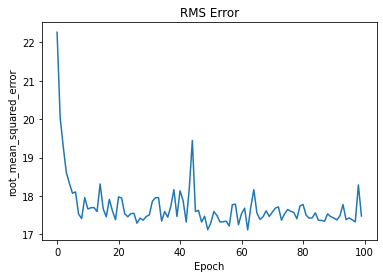

History of training for this location --> DKI2 (Kelapa Gading) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


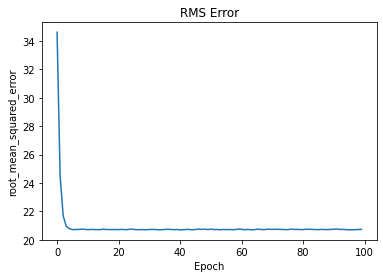

History of training for this location --> DKI2 (Kelapa Gading) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


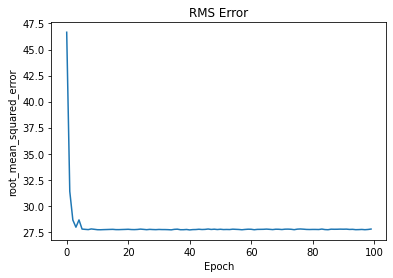

History of training for this location --> DKI2 (Kelapa Gading) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


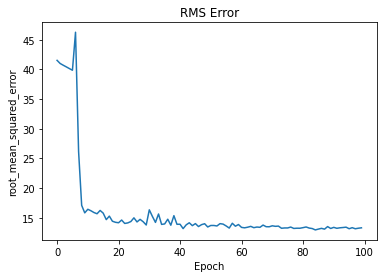

History of training for this location --> DKI2 (Kelapa Gading) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


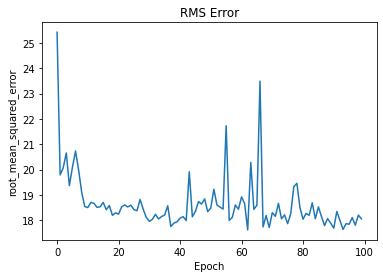

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2020-01-05 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      133 non-null    datetime64[ns]
 1   location  133 non-null    object        
 2   pm10      133 non-null    int64         
 3   so2       133 non-null    int64         
 4   co        133 non-null    int64         
 5   o3        133 non-null    int64         
 6   no2       133 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.3+ KB
None
Length of the array is -> 133
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2020-01-05 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      133 non-null    datetime64[ns]
 1   location  133 non-null    object        
 2   pm10      133 non-null    int64         
 3   s

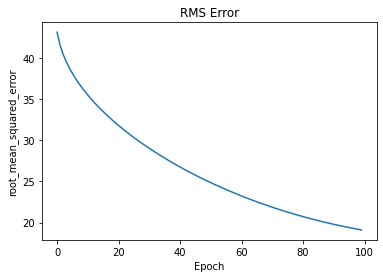

History of training for this location --> DKI3 (Jagakarsa) with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


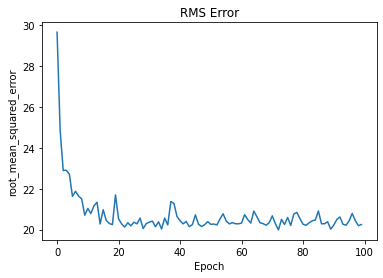

History of training for this location --> DKI3 (Jagakarsa) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


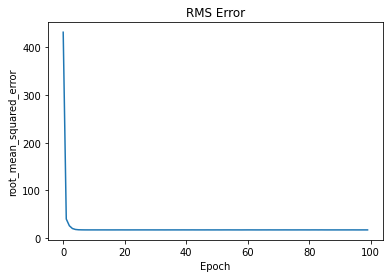

History of training for this location --> DKI3 (Jagakarsa) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


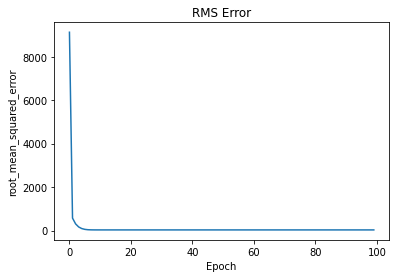

History of training for this location --> DKI3 (Jagakarsa) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


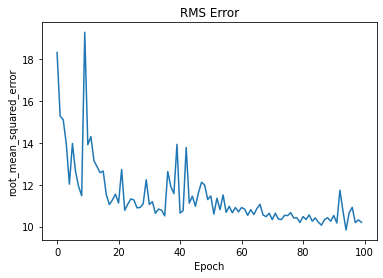

History of training for this location --> DKI3 (Jagakarsa) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


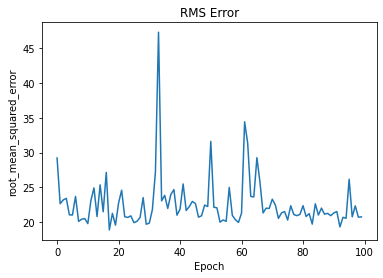

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-01-02 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      122 non-null    datetime64[ns]
 1   location  122 non-null    object        
 2   pm10      122 non-null    int64         
 3   so2       122 non-null    int64         
 4   co        122 non-null    int64         
 5   o3        122 non-null    int64         
 6   no2       122 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 7.6+ KB
None
Length of the array is -> 122
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-01-02 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      122 non-null    datetime64[ns]
 1   location  122 non-null    object        
 2   pm10      122 non-null    int64         
 3   s

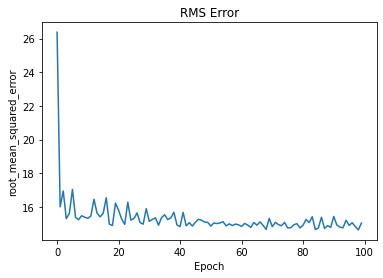

History of training for this location --> DKI4 (Lubang Buaya) with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


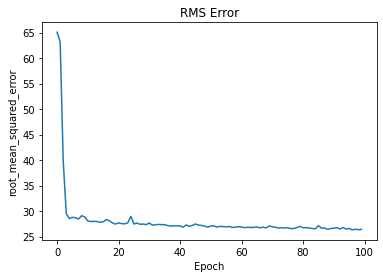

History of training for this location --> DKI4 (Lubang Buaya) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


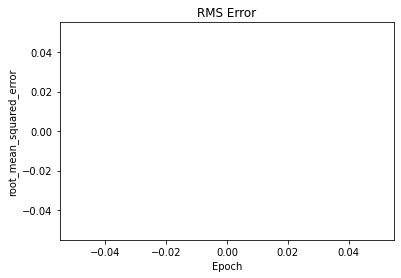

History of training for this location --> DKI4 (Lubang Buaya) with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


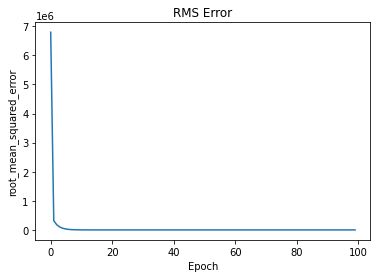

History of training for this location --> DKI4 (Lubang Buaya) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


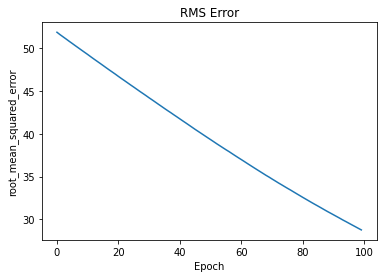

History of training for this location --> DKI4 (Lubang Buaya) with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


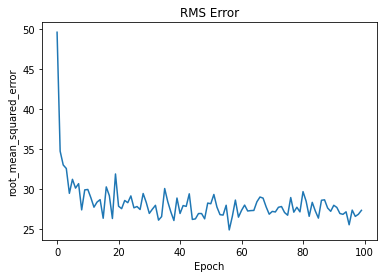

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2020-01-02 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      141 non-null    datetime64[ns]
 1   location  141 non-null    object        
 2   pm10      141 non-null    int64         
 3   so2       141 non-null    int64         
 4   co        141 non-null    int64         
 5   o3        141 non-null    int64         
 6   no2       141 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.8+ KB
None
Length of the array is -> 141
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2020-01-02 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      141 non-null    datetime64[ns]
 1   location  141 non-null    object        
 2   pm10      141 non-null    int64         
 3   s

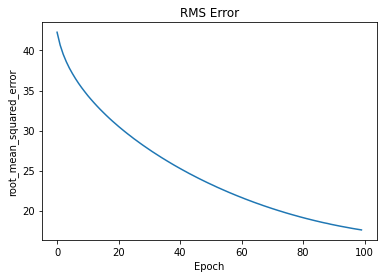

History of training for this location --> DKI5 (Kebon Jeruk) Jakarta Barat with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


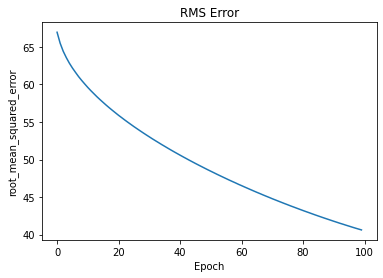

History of training for this location --> DKI5 (Kebon Jeruk) Jakarta Barat with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


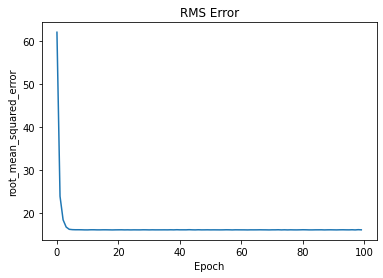

History of training for this location --> DKI5 (Kebon Jeruk) Jakarta Barat with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


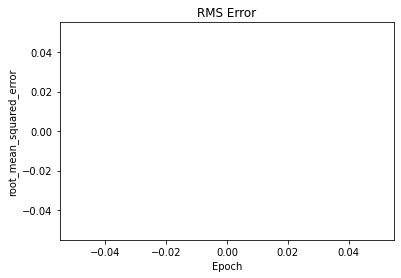

History of training for this location --> DKI5 (Kebon Jeruk) Jakarta Barat with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


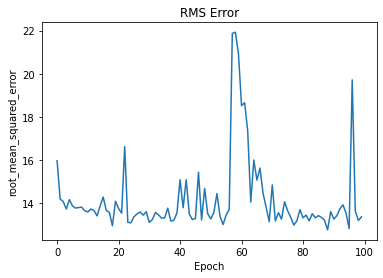

History of training for this location --> DKI5 (Kebon Jeruk) Jakarta Barat with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


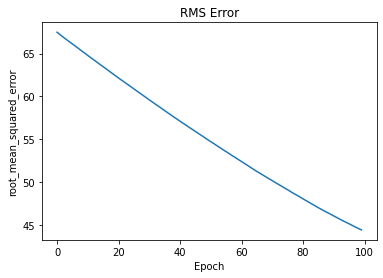

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2020-01-01 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      168 non-null    datetime64[ns]
 1   location  168 non-null    object        
 2   pm10      168 non-null    int64         
 3   so2       168 non-null    int64         
 4   co        168 non-null    int64         
 5   o3        168 non-null    int64         
 6   no2       168 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.5+ KB
None
Length of the array is -> 168
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2020-01-01 to 2020-06-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      168 non-null    datetime64[ns]
 1   location  168 non-null    object        
 2   pm10      168 non-null    int64         
 3   

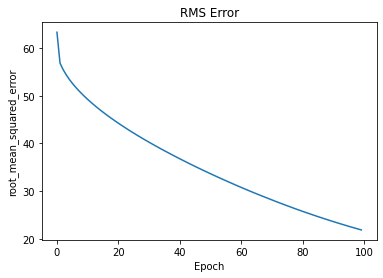

History of training for this location --> Province of DKI Jakarta with this optimiser --> <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130> for O3.


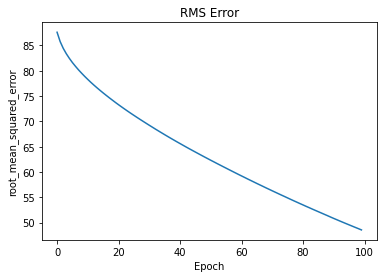

History of training for this location --> Province of DKI Jakarta with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for P10.


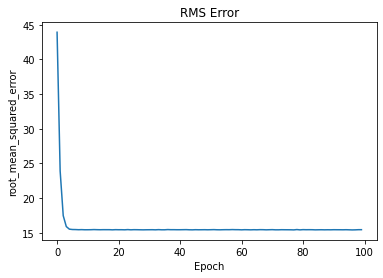

History of training for this location --> Province of DKI Jakarta with this optimiser --> <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50> for O3.


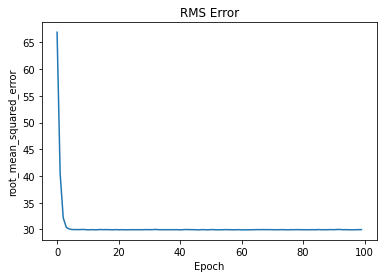

History of training for this location --> Province of DKI Jakarta with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for P10.


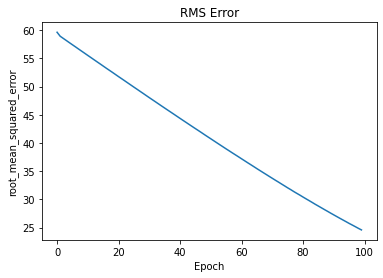

History of training for this location --> Province of DKI Jakarta with this optimiser --> <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20> for O3.


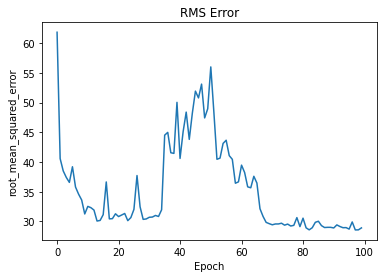

In [ ]:
tf.random.set_seed(221)

locations = ['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)', 'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk) Jakarta Barat', 'Province of DKI Jakarta']
optimizers = [tf.keras.optimizers.legacy.Adam(learning_rate=0.01), tf.keras.optimizers.legacy.SGD(learning_rate=0.01), tf.keras.optimizers.legacy.RMSprop(learning_rate=0.01)]

models1 = {}
rmse_train1 = {}

models2 = {}
rmse_train2 = {}


for locationX in locations:
  x_train, y_train, x_test, y_test = train_test_split(df, locationX, 'pm10')
  x_train_2, y_train_2, x_test_2, y_test_2 = train_test_split(df, locationX, 'o3')
  for opt in optimizers:
    model1 = create_model(opt) #calling the model creator function for 1st pollutant
    model2 = create_model(opt) #calling the model creator function for 2nd pollutant
    
    history_100 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=3, verbose=0)
    history_100_2 = model2.fit(x_train_2, y_train_2, validation_data=(x_test_2, y_test_2), epochs=100, batch_size=3, verbose=0)

    print("History of training for this location --> " + locationX +" with this optimiser --> " + str(opt) + ' for P10.')
    # plot the RMS Error
    plt.plot(history_100.history['root_mean_squared_error'])
    plt.title('RMS Error')
    plt.xlabel('Epoch')
    plt.ylabel('root_mean_squared_error')
    plt.show()

    models1[locationX + '_' + str(opt)] = model1
    rmse_train1[locationX + '_' + str(opt)] = history_100  

    print("History of training for this location --> " + locationX +" with this optimiser --> " + str(opt) + ' for O3.')
    # plot the RMS Error
    plt.plot(history_100_2.history['root_mean_squared_error'])
    plt.title('RMS Error')
    plt.xlabel('Epoch')
    plt.ylabel('root_mean_squared_error')
    plt.show()

    models2[locationX + '_'+ str(opt)] = model2
    rmse_train2[locationX + '_'+ str(opt)] = history_100_2

### Extracting specific history points for RMSE from history

We write two function to extract the values of RMSE from the history of when the model was being trained. We sperate it by the different optimiser and locations and later use the data frames to view the results of training and validation. 

In [ ]:
def segregate_by_opt(hist):
  adam = []
  sgd = []
  rmsprop = []
  df_final1 = pd.DataFrame()
  df_final2 = pd.DataFrame()
  df_final3 = pd.DataFrame()

  epochs = [9, 19, 29, 49, 99]
  for i in range(3):
    df_final = pd.DataFrame()
    for epoch in epochs:
      values_ = [hist[i].history['root_mean_squared_error'][epoch]]
      adam.append(values_)
      
      df_temp = pd.DataFrame(values_, index=['RMSE_'+str(epoch+1)], columns=['RMSE-value'])
      df_final = pd.concat([df_final,df_temp])
    
    if i == 0:
      df_final.rename(columns={'RMSE-value': 'ADAM'}, inplace=True)
      df_final1 = df_final
    elif i == 1:
      df_final.rename(columns={'RMSE-value': 'SGD'}, inplace=True)
      df_final2 = df_final
    elif i == 2:
      df_final.rename(columns={'RMSE-value': 'RMSprop'}, inplace=True)
      df_final3 = df_final

  return df_final1,df_final2,df_final3

def segregate_by_opt_val(hist):
  adam = []
  sgd = []
  rmsprop = []
  df_final1 = pd.DataFrame()
  df_final2 = pd.DataFrame()
  df_final3 = pd.DataFrame()

  epochs = [9, 19, 29, 49, 99]
  for i in range(3):
    df_final = pd.DataFrame()
    for epoch in epochs:
      values_ = [hist[i].history['val_root_mean_squared_error'][epoch]]
      adam.append(values_)
      
      df_temp = pd.DataFrame(values_, index=['RMSE_'+str(epoch+1)], columns=['RMSE-value'])
      df_final = pd.concat([df_final,df_temp])
    
    if i == 0:
      df_final.rename(columns={'RMSE-value': 'ADAM-val'}, inplace=True)
      df_final1 = df_final
    elif i == 1:
      df_final.rename(columns={'RMSE-value': 'SGD-val'}, inplace=True)
      df_final2 = df_final
    elif i == 2:
      df_final.rename(columns={'RMSE-value': 'RMSprop-val'}, inplace=True)
      df_final3 = df_final

  return df_final1,df_final2,df_final3
  
def segregate_by_loc(rmse_train):
  DK1 = []
  DK2 = []
  DK3 = []
  DK4 = []
  DK5 = []
  DK6 = []
  for key,value in rmse_train.items():
    print(key)
    
    if 'DKI1 (Bunderan HI)' in key:
      DK1.append(rmse_train[key])
    elif 'DKI2 (Kelapa Gading)' in key:
      DK2.append(rmse_train[key])
    elif 'DKI3 (Jagakarsa)' in key:
      DK3.append(rmse_train[key])
    elif 'DKI4 (Lubang Buaya)' in key:
      DK4.append(rmse_train[key])
    elif 'DKI5 (Kebon Jeruk) Jakarta Barat' in key:
      DK5.append(rmse_train[key])
    elif 'Province of DKI Jakarta' in key:
      DK6.append(rmse_train[key])

  return DK1,DK2,DK3,DK4,DK5,DK6

PM10_RMSE_VALUES = segregate_by_loc(rmse_train1)  
O3_RMSE_VALUES = segregate_by_loc(rmse_train2) 

DF_ADAM,DF_SGD,DF_RMSP = segregate_by_opt(PM10_RMSE_VALUES[0])
DF_ADAM2,DF_SGD2,DF_RMSP2 = segregate_by_opt(O3_RMSE_VALUES[0])

DF_ADAM_val,DF_SGD_val,DF_RMSP_val = segregate_by_opt_val(PM10_RMSE_VALUES[0])
DF_ADAM2_val,DF_SGD2_val,DF_RMSP2_val = segregate_by_opt_val(O3_RMSE_VALUES[0])


DKI1 (Bunderan HI)_<keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130>
DKI1 (Bunderan HI)_<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50>
DKI1 (Bunderan HI)_<keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20>
DKI2 (Kelapa Gading)_<keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130>
DKI2 (Kelapa Gading)_<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50>
DKI2 (Kelapa Gading)_<keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20>
DKI3 (Jagakarsa)_<keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130>
DKI3 (Jagakarsa)_<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6cfe777e50>
DKI3 (Jagakarsa)_<keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f6d0d533e20>
DKI4 (Lubang Buaya)_<keras.optimizers.optimizer_v2.adam.Adam object at 0x7f6d15f1a130>
DKI4 (Lubang Buaya)_<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f6c

In [ ]:
def merge(DF_1,DF_2,DF_3):
  result = pd.concat([DF_1, DF_2,DF_3], axis=1, sort=False)
  return result

DK1_RMSE_pm10 = merge(DF_ADAM,DF_SGD,DF_RMSP)
DK1_RMSE_o3 = merge(DF_ADAM2,DF_SGD2,DF_RMSP2)

print("-------------Training set error rate for DKI1 - Bunderan HI-------------")
print("-------------For PM10")
print(DK1_RMSE_pm10)
print("-------------For O3")
print(DK1_RMSE_o3)

-------------Training set error rate for DKI1 - Bunderan HI-------------
-------------For PM10
               ADAM        SGD    RMSprop
RMSE_10   10.984442  33.058655  33.058739
RMSE_20   10.957180  30.614031  30.614147
RMSE_30   11.244256  28.421675  28.421801
RMSE_50   10.313334  24.788807  24.788919
RMSE_100  10.261967  19.865715  19.865757
-------------For O3
               ADAM        SGD    RMSprop
RMSE_10   14.991224  13.887405  33.438488
RMSE_20   14.674807  13.807318  30.954853
RMSE_30   14.168460  13.481047  28.728621
RMSE_50   14.442188  13.920059  25.014416
RMSE_100  14.445804  13.678677  19.896307


In [ ]:
DK1_RMSE_pm10_val = merge(DF_ADAM_val,DF_SGD_val,DF_RMSP_val)
DK1_RMSE_o3_val = merge(DF_ADAM2_val,DF_SGD2_val,DF_RMSP2_val)

print("-------------Validation set error rate for DKI1 - Bunderan HI-------------")
print("-------------For PM10")
print(DK1_RMSE_pm10_val)
print("-------------For O3")
print(DK1_RMSE_o3_val)

-------------Validation set error rate for DKI1 - Bunderan HI-------------
-------------For PM10
           ADAM-val    SGD-val  RMSprop-val
RMSE_10   11.311384  46.511139    46.511238
RMSE_20   11.365637  43.587486    43.587635
RMSE_30   11.125472  40.855404    40.855564
RMSE_50   13.796741  35.932930    35.933094
RMSE_100  11.194962  27.031689    27.031805
-------------For O3
           ADAM-val    SGD-val  RMSprop-val
RMSE_10   19.422798  16.513288    45.863995
RMSE_20   16.961349  15.598465    43.028950
RMSE_30   16.868505  15.823800    40.377556
RMSE_50   17.096703  15.763837    35.654095
RMSE_100  16.739437  15.587564    27.264656


## STEP 6 - Visualising and Comparing the RMSE rates for different optmisers during training.

## PREDICTION

RMSE comparison tables represented above showed that one of the best performing optimisers for our data is Adam. We now try to use the best models to predict the data and graphically represent the models' prediction performance.

For the presentation purpose we will only try 2 models created. However, all the train models for each location/pollutant/optimiser combination are stored in:
- dictionary 'models1' for PM10 pollutant 
- dictionary 'models2' for O3 pollutant.

> **Predictions for PM10 in Bunderan HI**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2020-01-01 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      148 non-null    datetime64[ns]
 1   location  148 non-null    object        
 2   pm10      148 non-null    int64         
 3   so2       148 non-null    int64         
 4   co        148 non-null    int64         
 5   o3        148 non-null    int64         
 6   no2       148 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.2+ KB
None
Length of the array is -> 148
4/4 [==============================] - 0s 6ms/step


<ipython-input-67-a6ebc7c7dd26>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred['Predictions'] = DKI1_test_predictions
<ipython-input-67-a6ebc7c7dd26>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pred['Predictions'] = DKI1_train_predictions


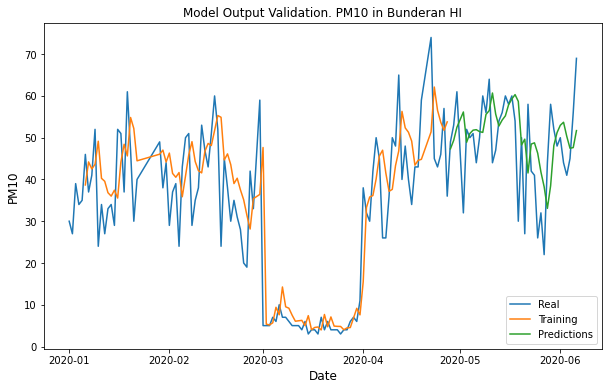

In [ ]:
# accessing the previously trained and stored model for PM10 in Bunderan HI
for key, value in models1.items():
    if 'DKI1 (Bunderan HI)' in key:
        if 'Adam' in key:
            model_DKI1_pm10 = models1[key]

            # predicting
            x_train_dki1, y_train_dki1, x_test_dki1, y_test_dki1 = train_test_split(df, 'DKI1 (Bunderan HI)', 'pm10')
            DKI1_test_predictions = model_DKI1_pm10.predict(x_test_dki1)
            DKI1_train_predictions = model_DKI1_pm10.predict(x_train_dki1)

            # preparing the data for graphical representation
            train_pred = df_bunderan[5:len(x_train_dki1)+5]
            test_pred = df_bunderan[len(x_train_dki1)+5:]
            test_pred['Predictions'] = DKI1_test_predictions
            train_pred['Predictions'] = DKI1_train_predictions

            # plotting
            plt.figure(figsize=(10,6))
            plt.title('Model Output Validation. PM10 in Bunderan HI')
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('PM10', fontsize=12)
            plt.plot(df_bunderan['pm10'])
            plt.plot(train_pred['Predictions'])
            plt.plot(test_pred['Predictions'])
            plt.legend(['Real', 'Training', 'Predictions'], loc='lower right')



> **Predictions for O3 in Lubang Buaya**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-01-02 to 2020-06-06
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      122 non-null    datetime64[ns]
 1   location  122 non-null    object        
 2   pm10      122 non-null    int64         
 3   so2       122 non-null    int64         
 4   co        122 non-null    int64         
 5   o3        122 non-null    int64         
 6   no2       122 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 7.6+ KB
None
Length of the array is -> 122
3/3 [==============================] - 0s 4ms/step


<ipython-input-68-27c69ff98844>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred['Predictions'] = DKI4_test_predictions
<ipython-input-68-27c69ff98844>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pred['Predictions'] = DKI4_train_predictions


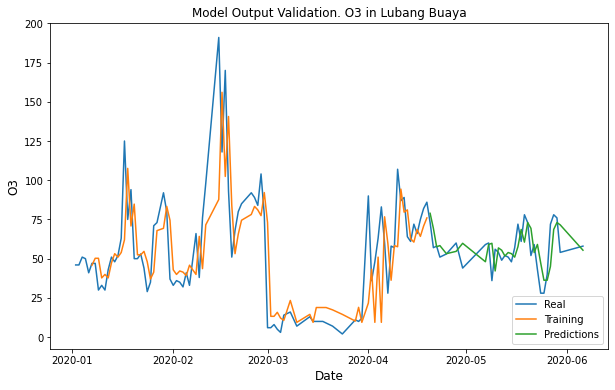

In [ ]:
# accessing the previously trained and stored model for O3 in Lubang Buaya
for key, value in models2.items():
    if 'DKI4 (Lubang Buaya)' in key:
        if 'Adam' in key:
            model_DKI4_o3 = models2[key]

            # predicting
            x_train_dki4, y_train_dki4, x_test_dki4, y_test_dki4 = train_test_split(df, 'DKI4 (Lubang Buaya)', 'o3')
            DKI4_test_predictions = model_DKI4_o3.predict(x_test_dki4)
            DKI4_train_predictions = model_DKI4_o3.predict(x_train_dki4)

            # preparing the data for graphical representation
            train_pred = df_lubang_buaya[5:len(x_train_dki4)+5]
            test_pred = df_lubang_buaya[len(x_train_dki4)+5:]
            test_pred['Predictions'] = DKI4_test_predictions
            train_pred['Predictions'] = DKI4_train_predictions

            # plotting
            plt.figure(figsize=(10,6))
            plt.title('Model Output Validation. O3 in Lubang Buaya')
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('O3', fontsize=12)
            plt.plot(df_lubang_buaya['o3'])
            plt.plot(train_pred['Predictions'])
            plt.plot(test_pred['Predictions'])
            plt.legend(['Real', 'Training', 'Predictions'], loc='lower right')